In [13]:
from torchvision.datasets import MNIST

download_root = './MNIST_DATASET'
train_dataset = MNIST(download_root, train=True, download=True)


100%|██████████| 9912422/9912422 [00:02<00:00, 4182695.74it/s]


Extracting ./MNIST_DATASET/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 2196994.65it/s]


Extracting ./MNIST_DATASET/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 1742513.49it/s]


Extracting ./MNIST_DATASET/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST_DATASET/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3219082.25it/s]

Extracting ./MNIST_DATASET/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST_DATASET/MNIST/raw



AttributeError: 'MNIST' object has no attribute 'shape'

In [5]:
import torch

from denoising_diffusion_pytorch import Unet, GaussianDiffusion


model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
)

training_images = torch.rand(8, 3, 128, 128) # images are normalized from 0 to 1
loss = diffusion(training_images)
loss.backward()
# after a lot of training

sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape # (4, 3, 128, 128)

sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

torch.Size([4, 3, 128, 128])

(128, 128, 3)


ValueError: x and y can be no greater than 2D, but have shapes (128,) and (128, 128, 3)

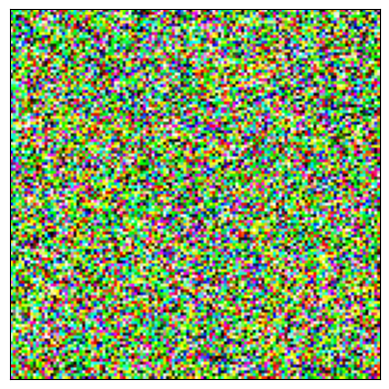

In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

# sampled_images = diffusion.sample(batch_size = 4)
fig = plt.figure()
for i in range(4):
    ax = fig.add_subplot(i//2+1,(i%2)+1,i+1)
    img = (sampled_images[i,:].squeeze(0).permute(1,2,0)).numpy()
    print(img.shape)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax.set_xticks([]), ax.set_yticks([])
    plt.plot(img)

#plt.show()